# Modelos de regresion linea
* y= a+b*x
* x: 100 valores distribuidos segun una N(1.5,2.5) N(media,Dev Estandar)
* Ye= 2 + 0.3*X
* Ye   12 +3.1X + e
* e Estará distribuido con una N(0, 0.8) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=  1.5 + 2.5 *  np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred= 5 + 1.9 *x
y_act= 5+1.9 * x + res
x_list= x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_act.tolist()
data=pd.DataFrame(
    {
        'x' : x_list,
        'y_actual' : y_act_list,
        'y_pred'  : y_pred_list
    
    }
)
data.head()

,x,y_actual,y_pred
0,0.373304,5.137586,5.709278
1,1.678422,6.002314,8.189001
2,-0.856830,3.895120,3.372024
3,6.549156,18.029679,17.443396
4,2.291470,8.513924,9.353793


In [3]:

y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]


Text(0.5, 1.0, 'Valor actual vs Prediccion')

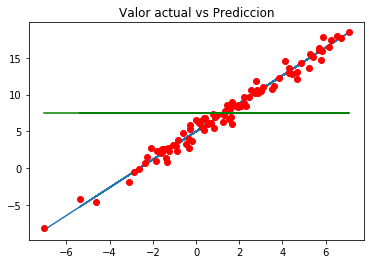

In [4]:
plt.plot(x,y_pred)
plt.plot(x,y_act, 'ro')
plt.plot(x,y_mean, 'g')
plt.title('Valor actual vs Prediccion')


In [5]:
y_m=np.mean(data['y_actual'])
data['SSR']=(data['y_pred']-y_m)**2
data['SSD']=(data['y_pred']-data['y_actual'])**2
data['SST']=(data['y_actual']-y_m)**2
data.head()



,x,y_actual,y_pred,SSR,SSD,SST
0,0.373304,5.137586,5.709278,3.251255,0.326831,5.639748
1,1.678422,6.002314,8.189001,0.457787,4.781602,2.280365
2,-0.856830,3.895120,3.372024,17.142729,0.273630,13.084725
3,6.549156,18.029679,17.443396,98.624645,0.343728,110.613132
4,2.291470,8.513924,9.353793,3.390721,0.705380,1.003046


In [6]:
SSR=sum(data['SSR'])
SSD=sum(data['SSD'])
SST=sum(data['SST'])


In [7]:
SST

2830.1008986679717

In [8]:
SSD

62.58985731567859

In [9]:
SSR

2835.163683919591

In [10]:
SSR+SSD

2897.75354123527

In [11]:
R2=SSR/SST

In [12]:
R2

1.0017889062732719

(array([ 6.,  5., 14., 18., 25., 12.,  8.,  8.,  3.,  1.]),
 array([-1.74238465, -1.34947744, -0.95657023, -0.56366302, -0.17075581,
         0.2221514 ,  0.61505861,  1.00796581,  1.40087302,  1.79378023,
         2.18668744]),
 <a list of 10 Patch objects>)

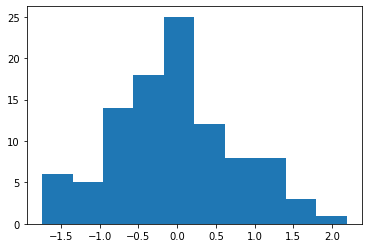

In [13]:
plt.hist(data['y_pred']-data['y_actual'])

In [14]:
x_mean=np.mean(data['x'])
y_mean2=np.mean(data['y_actual'])

In [15]:
# Data covarianza
data['beta_n'] = (data['x']-x_mean)*(data['y_actual']-y_mean2)
# Data Varianza
data['beta_d'] = (data['x']-x_mean)**2


In [16]:
beta=sum(data['beta_n'])/sum(data['beta_d'])
alpha=y_mean2-beta*x_mean


## El Modelo lineal obtenido por regresion lineal es:
* Y= a+b*X

In [17]:
alpha,beta

(5.067141534818767, 1.8774254237415184)

In [18]:
data['y_model']=alpha +beta*data['x']
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.373304,5.137586,5.709278,3.251255,0.326831,5.639748,2.206559,0.863319,5.767992
1,1.678422,6.002314,8.189001,0.457787,4.781602,2.280365,-0.567744,0.141352,8.218253
2,-0.856830,3.895120,3.372024,17.142729,0.273630,13.084725,7.810736,4.662505,3.458508
3,6.549156,18.029679,17.443396,98.624645,0.343728,110.613132,55.181020,27.527879,17.362693
4,2.291470,8.513924,9.353793,3.390721,0.705380,1.003046,0.990521,0.978153,9.369205


In [19]:
y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]

SSR=sum((data['y_model']-np.mean(data['y_actual']))**2)
SSD=sum((data['y_model']-data['y_actual'])**2)
SST=sum((data['y_actual']-y_mean)**2)

In [20]:
SSR, SSD, SST

(2768.0536763630175, 62.047222304955845, 2830.1008986679717)

In [21]:
R2= SSR/SST
R2


0.9780759681274411

Text(0.5, 1.0, 'Valor actual vs Prediccion')

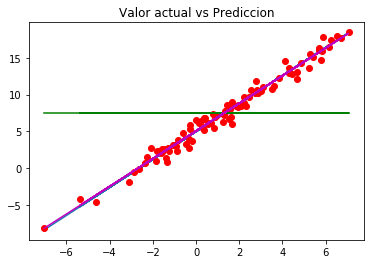

In [22]:
plt.plot(data['x'],data['y_pred'])
plt.plot(data['x'],data['y_actual'], 'ro')
plt.plot(data['x'],y_mean, 'g')
plt.plot(data['x'],data['y_model'], 'm')
plt.title('Valor actual vs Prediccion')

In [23]:
# Calcular el Error estandar de los residuos
RSE=np.sqrt(SSD/(len(data)-2))
RSE

0.7956977576185202

In [38]:
# Porcentaje del RSE
PRSE=(RSE/np.mean(data['y_actual']))
print(PRSE, "%")

0.10591789419297502 %


In [30]:
x_mean=np.mean(data['x'])
x_mean

1.302453899104825

In [32]:
y_mean=np.mean(data['y_actual'])
y_mean

7.512401598249436

In [34]:
x_mean,y_mean

(1.302453899104825, 7.512401598249436)

### Calcular por Pases las predicciones


In [35]:
data['beta_n']=(data['x']-x_mean)*(data['y_actual']-y_mean)
data

,x,y_actual,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.373304,5.137586,5.709278,3.251255,0.326831,5.639748,2.206559,0.863319,5.767992
1,1.678422,6.002314,8.189001,0.457787,4.781602,2.280365,-0.567744,0.141352,8.218253
2,-0.856830,3.895120,3.372024,17.142729,0.273630,13.084725,7.810736,4.662505,3.458508
3,6.549156,18.029679,17.443396,98.624645,0.343728,110.613132,55.181020,27.527879,17.362693
4,2.291470,8.513924,9.353793,3.390721,0.705380,1.003046,0.990521,0.978153,9.369205
...,...,...,...,...,...,...,...,...,...
95,4.314437,12.927693,13.197430,32.319543,0.072758,29.325381,16.310764,9.072040,13.167175
96,2.094082,8.449074,8.978756,2.150195,0.280563,0.877355,0.741496,0.626675,8.998624
97,-4.651291,-4.516266,-3.837454,128.819215,0.460786,144.688840,71.615622,35.447083,-3.665311
98,-1.063055,3.130354,2.980196,20.540891,0.022547,19.202345,10.365774,5.595632,3.071335
